# Jason Kabatoff

## Research question/interests

My research interest is to understand how productivity, measured in output per work hour, changes in correlation with certain variables. The variables selected vary by year for annual working hours per worker, GDP per capita, population, and days of vacation in a variety of countries. By investigating these variables, we can determine whether less or more work hours tend to correlate with countries that have higher GDP per capita, but also how those work hours are associated with higher productivities. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

# Task 1 / 2
## Setting up Dataframe
combining vacation days data with country data such as population, year, real GDPE (rgdpe), and average hours worked (avh).
Also removing NaN values.

In [2]:
df_vac = pd.read_csv('../data/raw/days-of-vacation-and-holidays.csv') #Vacation days data
df_pwt = pd.read_csv('../data/raw/pwt100.csv',encoding='cp1251') #Penn-world table data

In [3]:
df_pwt.columns

Index(['countrycode', 'country', 'currency_unit', 'year', 'rgdpe', 'rgdpo',
       'pop', 'emp', 'avh', 'hc', 'ccon', 'cda', 'cgdpe', 'cgdpo', 'cn', 'ck',
       'ctfp', 'cwtfp', 'rgdpna', 'rconna', 'rdana', 'rnna', 'rkna', 'rtfpna',
       'rwtfpna', 'labsh', 'irr', 'delta', 'xr', 'pl_con', 'pl_da', 'pl_gdpo',
       'i_cig', 'i_xm', 'i_xr', 'i_outlier', 'i_irr', 'cor_exp', 'statcap',
       'csh_c', 'csh_i', 'csh_g', 'csh_x', 'csh_m', 'csh_r', 'pl_c', 'pl_i',
       'pl_g', 'pl_x', 'pl_m', 'pl_n', 'pl_k'],
      dtype='object')

I only really need the country, year, population, rgdpe, and avh. So I will extract those and then combine that result with the vacation data.

In [4]:
df_data = df_pwt[['country', 'year', 'pop', 'rgdpe', 'avh',]]
df_data = df_data.dropna()
df_vac = df_vac.rename(columns = {'Year': 'year', 'Entity': 'country'})
#Taking only the countries im interested in
df_data = df_data[df_data['country'].isin(['Australia', 'Belgium', 'Canada', 'Denmark', 'France', 'Germany', 'Ireland', 'Italy', 'Netherlands', 'Spain',
                                          'Sweden', 'Switzerland', 'United Kingdom', 'United States'])]

In [5]:
df = pd.merge(df_data, df_vac, how='left', on = ['country', 'year'])
df = df.fillna(method='ffill')
df = df.dropna()
print(df)

           country  year         pop         rgdpe          avh Code  \
0        Australia  1950    8.354106  1.221764e+05  2170.923406  AUS   
1        Australia  1951    8.599923  1.140998e+05  2150.846928  AUS   
2        Australia  1952    8.782430  1.113938e+05  2130.956115  AUS   
3        Australia  1953    8.950892  1.235207e+05  2111.249251  AUS   
4        Australia  1954    9.159148  1.316807e+05  2091.724634  AUS   
..             ...   ...         ...           ...          ...  ...   
974  United States  2015  320.878310  1.890512e+07  1770.023174  USA   
975  United States  2016  323.015995  1.928525e+07  1766.744125  USA   
976  United States  2017  325.084756  1.975475e+07  1763.726676  USA   
977  United States  2018  327.096265  2.036944e+07  1774.703811  USA   
978  United States  2019  329.064917  2.086051e+07  1765.346390  USA   

     Days of vacation and holidays for full-time production workers in non-agricultural activities (Huberman & Minns 2007)  
0         

In [6]:
df_vac.shape

(97, 4)

---
## Great, my data is all ready to work with now. 
---

In [7]:
df.rename(columns={ 'Days of vacation and holidays for full-time production workers in non-agricultural activities (Huberman & Minns 2007)': 'vacation days'}, inplace=True)

In [8]:
df

,country,year,pop,rgdpe,avh,Code,vacation days
0,Australia,1950,8.354106,1.221764e+05,2170.923406,AUS,22.0
1,Australia,1951,8.599923,1.140998e+05,2150.846928,AUS,22.0
2,Australia,1952,8.782430,1.113938e+05,2130.956115,AUS,22.0
3,Australia,1953,8.950892,1.235207e+05,2111.249251,AUS,22.0
4,Australia,1954,9.159148,1.316807e+05,2091.724634,AUS,22.0
...,...,...,...,...,...,...,...
974,United States,2015,320.878310,1.890512e+07,1770.023174,USA,20.0
975,United States,2016,323.015995,1.928525e+07,1766.744125,USA,20.0
976,United States,2017,325.084756,1.975475e+07,1763.726676,USA,20.0
977,United States,2018,327.096265,2.036944e+07,1774.703811,USA,20.0


Gonna start by making a metric for productivity. First I will need gdp per capita, then I can calculate productivity by dividing gdp per capita by the average hours worked on average.

In [9]:
df['gdp per capita'] = df['rgdpe']/df['pop']
df['productivity'] = df['gdp per capita']/df['avh']

In [10]:
df = df[['country', 'year', 'pop', 'avh', 'rgdpe', 'gdp per capita', 'vacation days', 'productivity']]
df.head()
#Looks good!

,country,year,pop,avh,rgdpe,gdp per capita,vacation days,productivity
0,Australia,1950,8.354106,2170.923406,122176.4219,14624.715005,22.0,6.736633
1,Australia,1951,8.599923,2150.846928,114099.8125,13267.539508,22.0,6.168519
2,Australia,1952,8.782430,2130.956115,111393.7578,12683.706056,22.0,5.952120
3,Australia,1953,8.950892,2111.249251,123520.6563,13799.814882,22.0,6.536327
4,Australia,1954,9.159148,2091.724634,131680.6875,14376.957940,22.0,6.873256


### Now I'll start with some analysis. Where Task 1 Really starts:

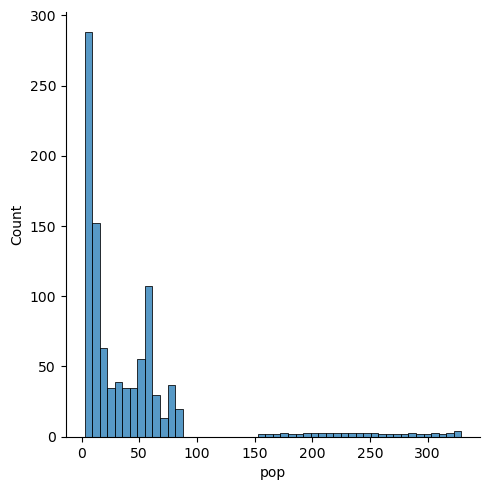

In [11]:
#Most of our data is looking at countries/years with populations of less than 100million, 
#while a few exceptions are in the >100 million population range
sns.displot(df['pop'], bins = 50)

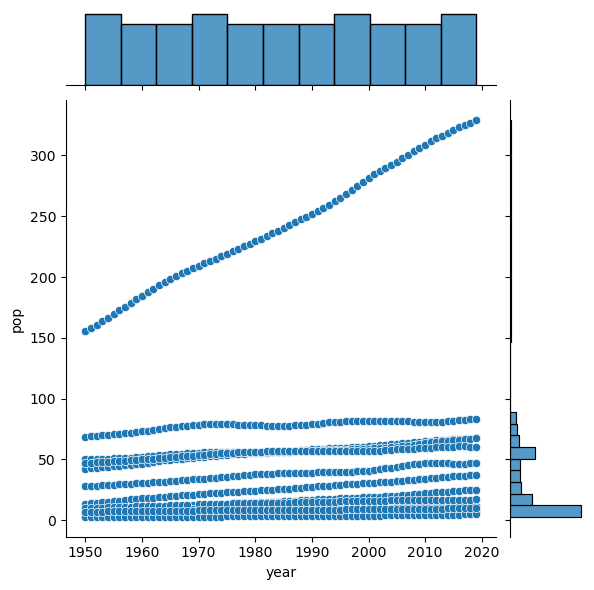

In [12]:
sns.jointplot(x='year', y='pop', data = df)
#One single country, the US, dominating in terms of population for our data. 
#For that reason, I created a separate dataset without the US.

The issue with the US will likely be annoying when trying to interpret data. So I will make another dataset without the US.

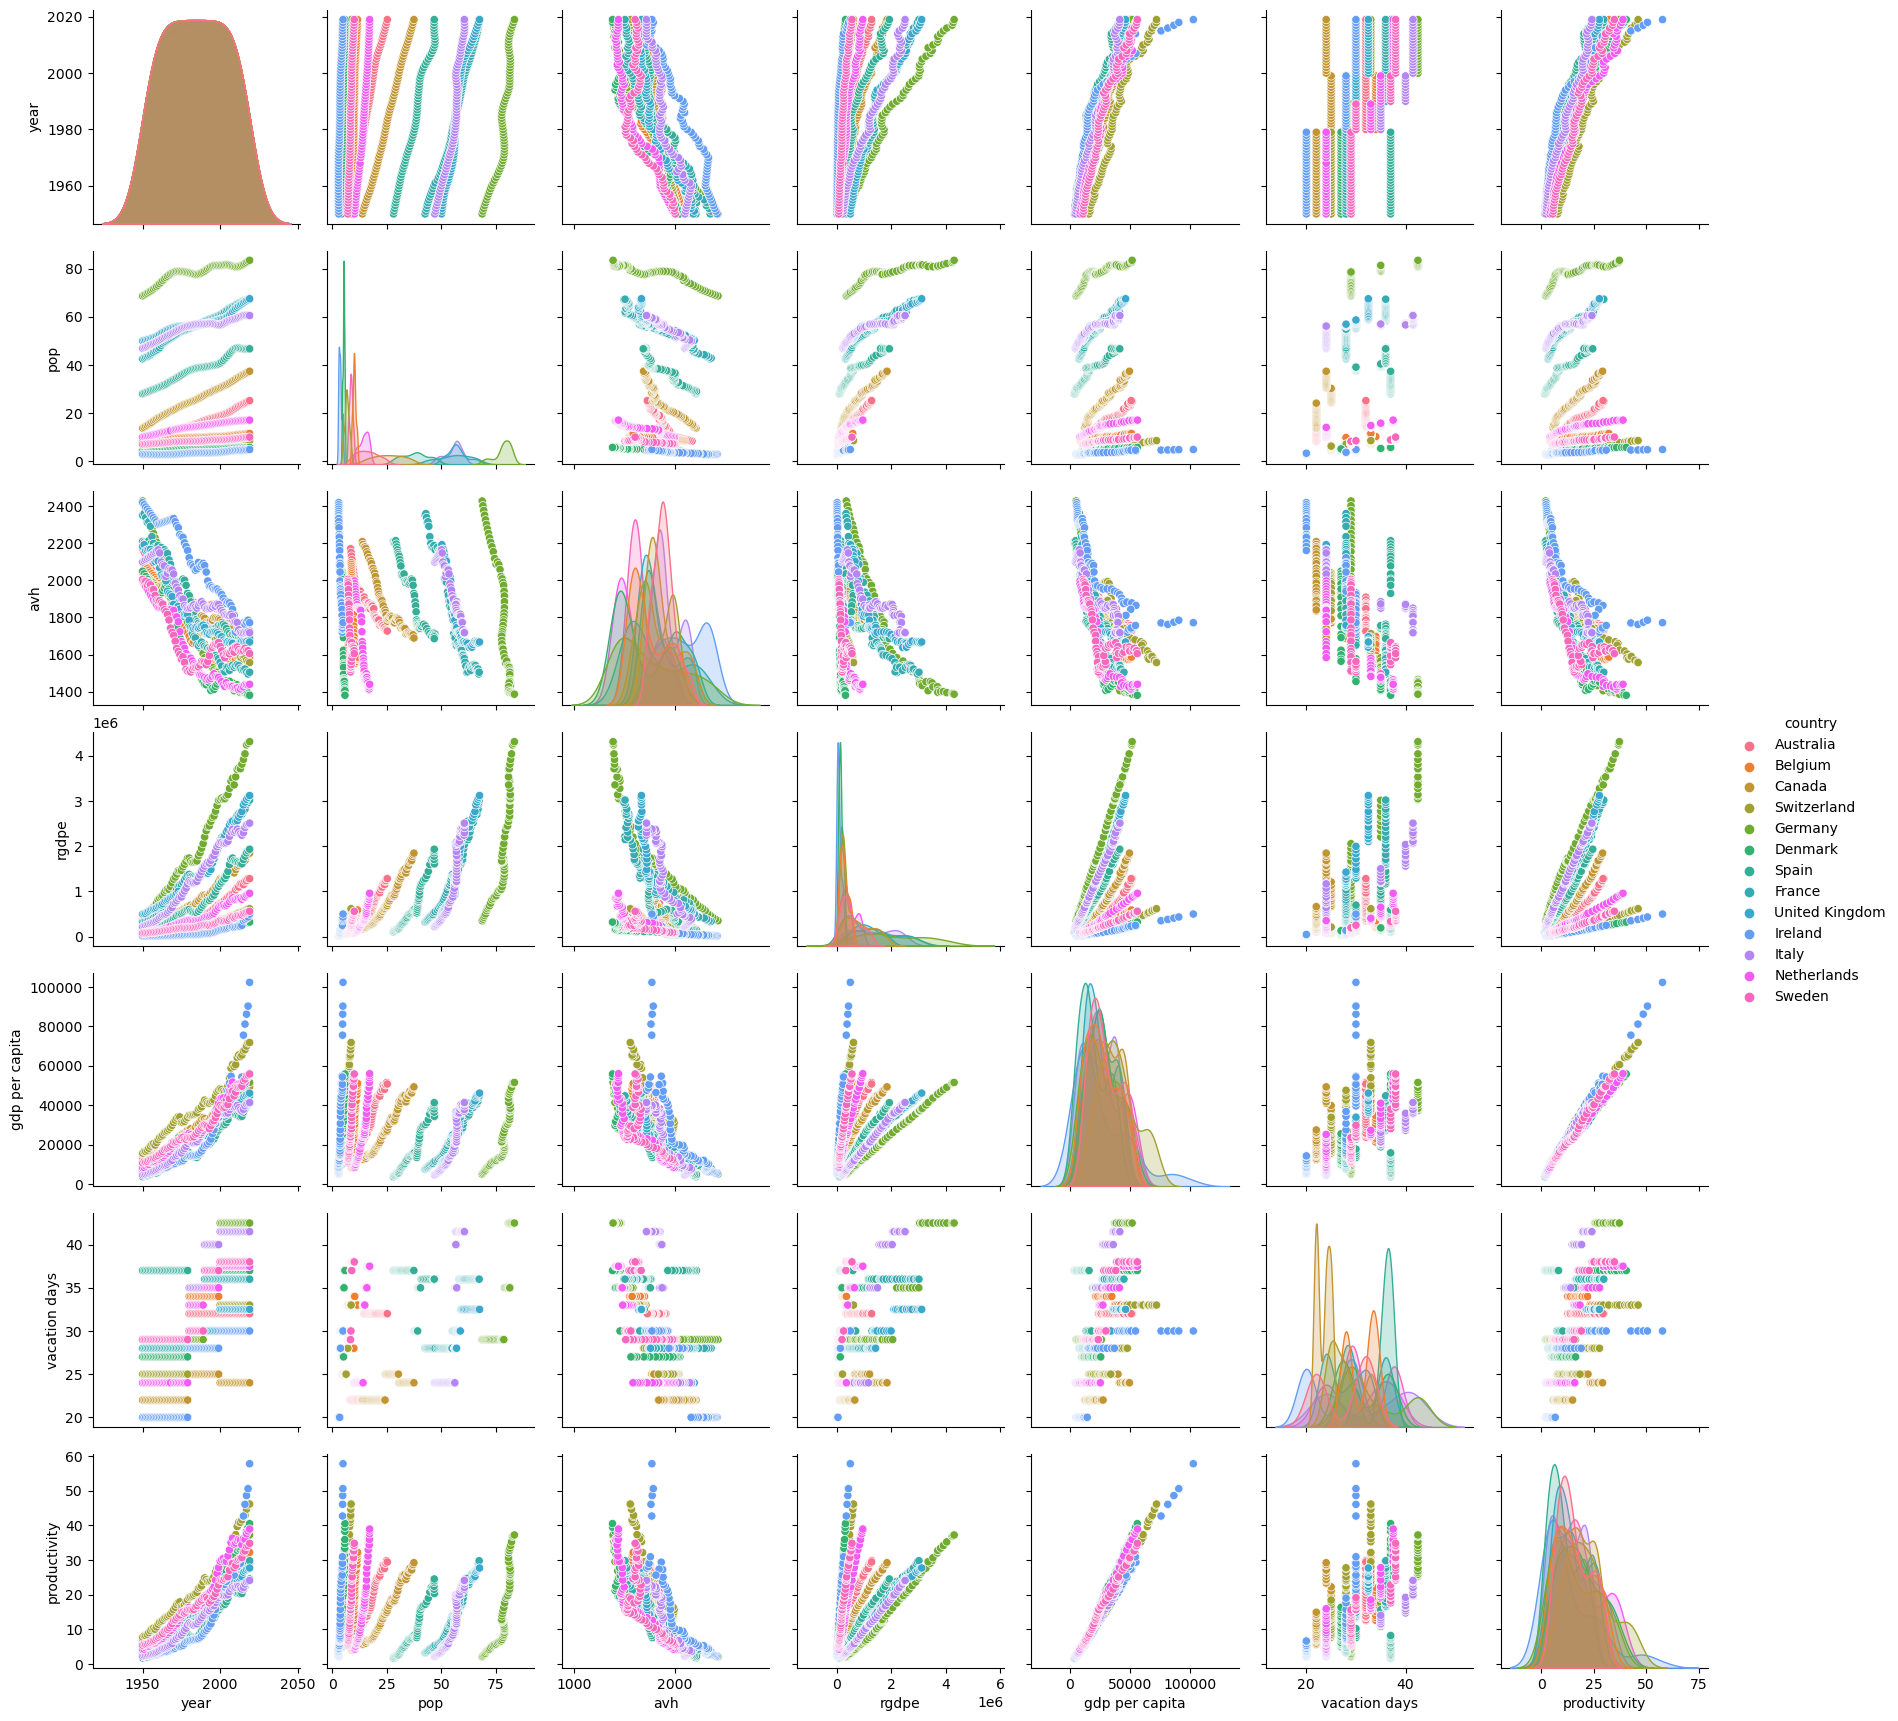

In [13]:
df_s = df.copy()   
df_s.drop(df_s[df_s['country'] == 'United States'].index, inplace = True)
sns.pairplot(df_s, hue='country')

<p> Some trends from this show that as population increases, productivity also tends to increases, but these are linked variables. As the years increase, productivity increases which is good to see. 
    Also as the year increases, average working hours steeply decreases, while rdgpe continues to climb.

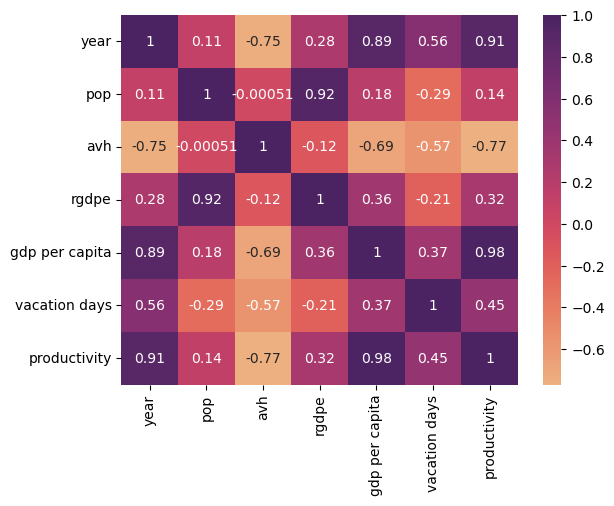

In [14]:
df_corr = df.corr()
ht = sns.heatmap(df_corr, annot = True, cmap = 'flare')

Interestingly from the heat map annual working hours is negatively correlated with productivity.

<AxesSubplot:xlabel='vacation days', ylabel='productivity'>

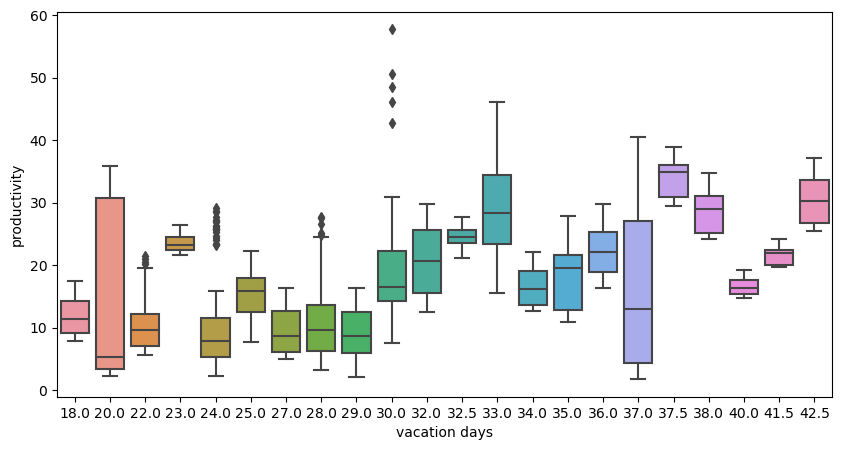

In [15]:
plt.figure(figsize=(10,5))
sns.boxplot(x='vacation days', y='productivity', data = df)

It appears that between 30 and 42 vacation days per year is correlated with higher productivity, probably something worth investigating more.

---
# Task 2: Pipeline

Pretty much loaded, cleaned, and processed most of what I needed already at the start. I will make this process more neat in task 3 and optimizae it.

---
# Task 3: Method Chaining

In [16]:
import functions_1 as fn1

In [17]:
df_clean = fn1.clean_and_secure('../data/raw/pwt100.csv', '../data/raw/days-of-vacation-and-holidays.csv')
df_clean

,country,year,pop,avh,rgdpe,gdp per capita,vacation days,productivity,gdp per vac days
0,Australia,1950,8.354106,2170.923406,1.221764e+05,14624.715005,22.0,6.736633,5.553474e+03
1,Australia,1951,8.599923,2150.846928,1.140998e+05,13267.539508,22.0,6.168519,5.186355e+03
2,Australia,1952,8.782430,2130.956115,1.113938e+05,12683.706056,22.0,5.952120,5.063353e+03
3,Australia,1953,8.950892,2111.249251,1.235207e+05,13799.814882,22.0,6.536327,5.614575e+03
4,Australia,1954,9.159148,2091.724634,1.316807e+05,14376.957940,22.0,6.873256,5.985486e+03
...,...,...,...,...,...,...,...,...,...
974,United States,2015,320.878310,1770.023174,1.890512e+07,58916.796215,20.0,33.285890,9.452561e+05
975,United States,2016,323.015995,1766.744125,1.928525e+07,59703.706004,20.0,33.793069,9.642626e+05
976,United States,2017,325.084756,1763.726676,1.975475e+07,60768.010912,20.0,34.454324,9.877377e+05
977,United States,2018,327.096265,1774.703811,2.036944e+07,62273.532839,20.0,35.089536,1.018472e+06


In [18]:
df_clean.drop(df_clean[df_clean['country'] == 'United States'].index, inplace = True)

In [19]:
df_clean.to_csv('milestone4_data.csv')

---
# Task 4: Analysis

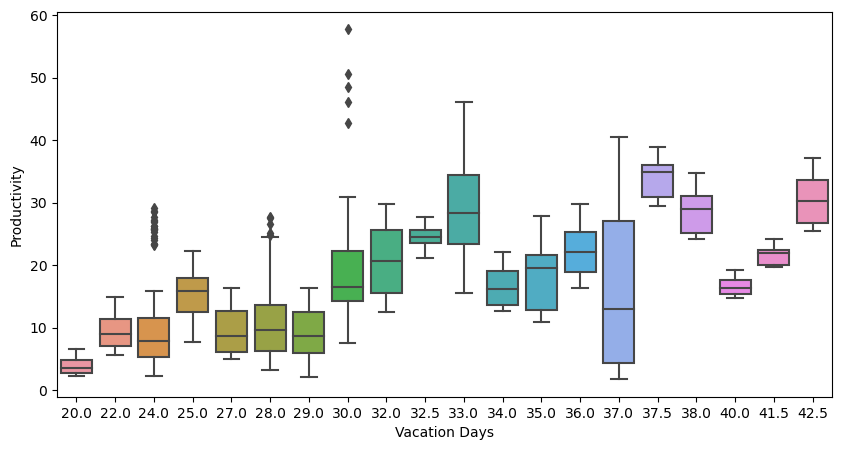

In [22]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(x='vacation days', y='productivity', data = df_clean)
ax.set(ylabel = "Productivity")
ax.set(xlabel = "Vacation Days")
plt.savefig('../images/bar_plot.png')

By examining the box plot above, there is a rough trend where vacation days below 30 annually are associated with a lower productivity, whereas vacation days over 30 are associated with a higher productivity. However, this trend is based on the medians of productivity, but the whiskers of many boxes cover a wide range showing large variations between countries. 

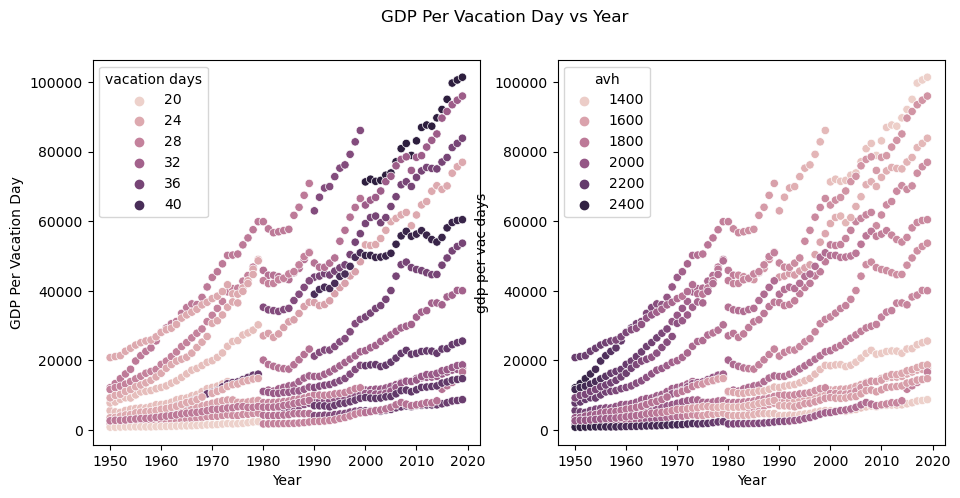

In [ ]:
fig, axs = plt.subplots(ncols=2)
fig.set_figheight(5)
fig.set_figwidth(11)
axs[0].set_xlabel("Year")
axs[1].set_xlabel("Year")
axs[0].set_ylabel("GDP Per Vacation Day")
fig.suptitle('GDP Per Vacation Day vs Year')

df_noUS = df_clean.copy()   
df_noUS.drop(df_noUS[df_noUS['country'] == 'United States'].index, inplace = True)
sns.scatterplot(x='year', y='gdp per vac days', data = df_noUS, hue='vacation days', ax =axs[0])
sns.scatterplot(x='year', y='gdp per vac days', data = df_noUS, hue='avh', ax=axs[1])

plt.savefig('../images/GDP_vacation_day.png')

In the second figure above, two plots are shown. Both are plots of GDP per Vacation day versus Year, however, the left plot’s hue is based on the number of vacation days while the right plot’s hue is based on the average hours worked per year. 

An important thing to notice in these plots is that the maximum GDP per Vacation day correlates to a country with both high vacation days and a low average hours worked. That general property is obeyed for most of the points at high values on the Y-axis. This may indicate that countries with high vacation days and lower hours work tend to have higher value per vacation day.

Additionally, trends can be seen where as vacation days increase, the GDP per Vacation Day obviously drops. However, the slope after these drops is important: a positive slope after an increase indicates that the country remained prosperous afterwards, whereas a negative slope indicates that the country was not prosperous after increasing vacation days. Generally, positive slopes are seen after most increases except in the case where vacation days are already high. Overall this indicates that for countries with less than 35 vacation days per year, increasing generally wont negatively impact the country’s prosperity.
